In [1]:
import MDAnalysis as mda
import prolif as plf

c:\Users\dell\anaconda3\Lib\site-packages\MDAnalysis\topology\tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)


In [2]:
u = mda.Universe('./complex.gro', './md-2_compress.xtc')
ligand_sele = u.select_atoms("resname ATP")
protein_sele = u.select_atoms("protein")
ligand_sele.guess_bonds()
protein_sele.guess_bonds()


In [3]:
elements = [
    mda.topology.guessers.guess_atom_element(x)
    for x in u.atoms.names
]
u.add_TopologyAttr("elements", elements)

C:\Users\dell\AppData\Local\Temp\ipykernel_169668\3177899396.py:2: DeprecationWarning: `guess_atom_element` is deprecated!
`guess_atom_element` will be removed in release 3.0.0.
MDAnalysis.topology.guessers is deprecated in favour of the new Guessers API. See MDAnalysis.guesser.default_guesser for more details.
  mda.topology.guessers.guess_atom_element(x)


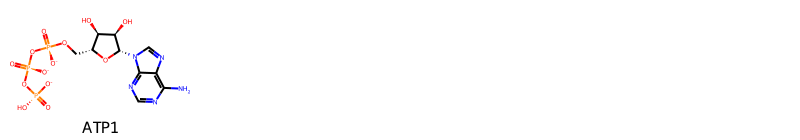

In [6]:
ligand_mol = plf.Molecule.from_mda(ligand_sele)
plf.display_residues(ligand_mol)

In [7]:
fp = plf.Fingerprint()
fp.run(u.trajectory, ligand_sele, protein_sele)

  0%|          | 0/1001 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBAcceptor', 'HBDonor', 'Cationic', 'Anionic', 'CationPi', 'PiCation', 'PiStacking', 'VdWContact'] at 0x239de5640d0>

In [8]:
df = fp.to_dataframe()

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from rdkit import DataStructs

# Tanimoto similarity matrix
bitvectors = fp.to_bitvectors()
similarity_matrix = []
for bv in bitvectors:
    similarity_matrix.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors))
similarity_matrix = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# display heatmap
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
colormap = sns.diverging_palette(
    300, 145, s=90, l=80, sep=30, center="dark", as_cmap=True
)
sns.heatmap(
    similarity_matrix,
    ax=ax,
    square=True,
    cmap=colormap,
    vmin=0,
    vmax=1,
    center=0.5,
    xticklabels=5,
    yticklabels=5,
)
ax.invert_yaxis()
plt.yticks(rotation="horizontal")
fig.patch.set_facecolor("white")

<Axes: xlabel='Frame'>

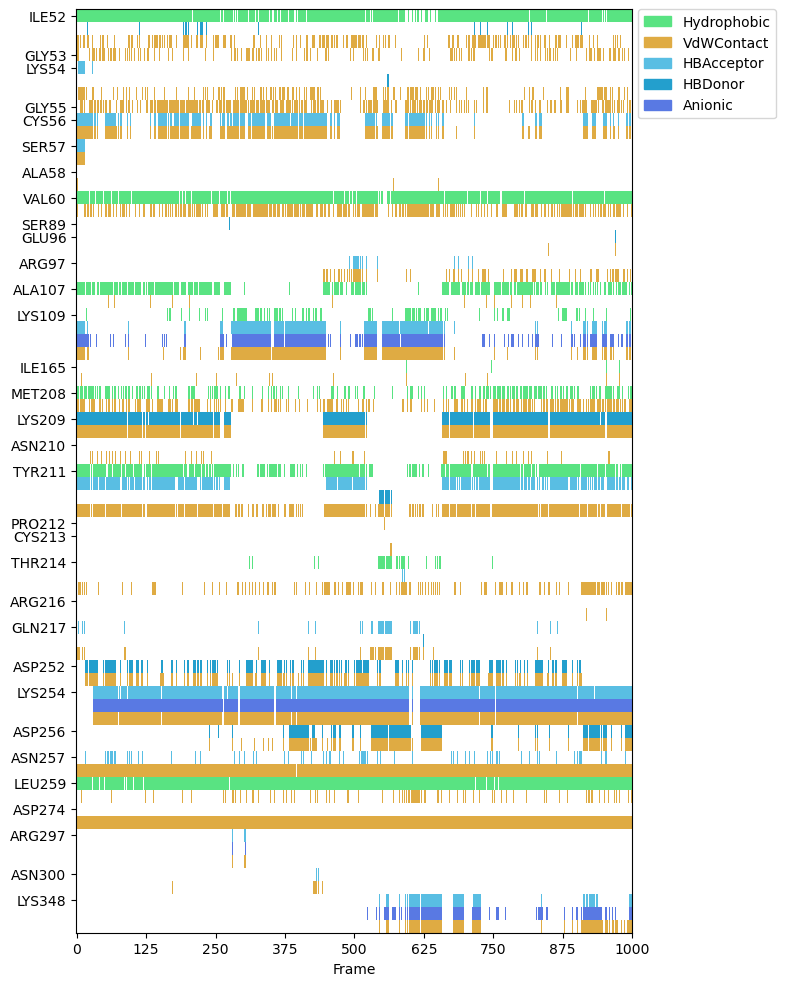

In [9]:
fp.plot_barcode()

In [13]:
view = fp.plot_lignetwork(ligand_mol,threshold=0.5)
view


In [14]:
from IPython.display import display, HTML

with open('ligand-2.html', 'w', encoding='utf-8') as f:
    f.write(view.data)

In [ ]:
frame1 = 400
u.trajectory[400]
protein_mol = plf.Molecule.from_mda(protein_sele)
fp_count = plf.Fingerprint(count=True)
fp_count.run(u.trajectory, ligand_sele, protein_sele)
show = fp_count.plot_3d(ligand_mol, protein_mol, frame=frame1, display_all=False)
show